In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os




for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv
/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


<div class="anchor" id="top" style=" margin-right: auto; margin-left: auto; padding: 10px; font-size : 15px; background-color: #DFFFFE; border-radius: 2px; font-color :  #581845  ; border: 2px solid #581845;"> This project is about Customer Churn, Customer churn is the percentage of customers who stop buying a business's products or services over a certain period of time. It's also known as customer attrition, customer turnover, or customer defection. <b>This is a typical binary classification problem, and we will predict customer churn in banking industry using machine learning.</b> 



<div class="anchor" id="top" style=" margin-right: auto; margin-left: auto; padding: 10px; font-size : 15px; background-color: #DFFFFE; border-radius: 2px; font-color :  #581845  ; border: 2px solid #581845;"> Objective: The loss of clients or customers, holds significant importance for Bank. Forecasting potential churn for individual customers can assist in implementing strategies to prevent their loss. The goal is to predict whether a customer continues with their account or closes it.

# <center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Table of contents </p>   </span></font></center> 
# Table of contents 

<div class="anchor" id="top" style="
    margin-right: auto; 
    margin-left: auto;
    padding: 10px;
   font-size : 15px;
    background-color: #DFFFFE;
    border-radius: 2px;
    font-color :  #581845  ;        
    border: 2px solid #581845;">
 
- [1. Dataset Description](#1)
- [2. Data Cleaning](#2)
    - [2.1 Null values & Duplicate values](#2.1)
    - [2.2 Detect Outlier](#2.2)
    - [2.3 Target Distribution](#2.3)
- [3. Exploratory Data Analysis](#3)
    - [3.1 Continuous and Categorical Features](#3.1)
    - [3.2 Categorical Value Analysis](#3.2)
    - [3.3 Numerical Value Analysis](#3.3)
    - [3.4 Correlation Matrix with Analysis](#3.4)
- [4. Feature Engineering](#4)
    - [4.1 Create Features](#4.1)  
    - [4.2 Scaling of Numeric Features](#4.2) 
    - [4.3 One-hot Encoding](#4.3)
    - [4.4 Ordinal Encoding](#4.4)
- [5. Modeling](#5)
    - [5.1 Logistic Regression (Baseline)](#5.1)
    - [5.2 AdaBoost](#5.2)
    - [5.3 Random Forest](#5.3)
    - [5.4 XGBoost](#5.4)
    - [5.5 LightGBM](#5.5)
    - [5.6 CatBoost](#5.6)
- [6. Results and Analysis](#6)
- [7.  Discussion and Conclusion](#7)

# <a id="1"></a><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Dataset Description </p>   </span></font></center> 

# 1. Dataset Description
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Bank Customer Churn Prediction dataset. Feature distributions are close to, but not exactly the same, as the original.
<div class="anchor" id="top" style="
    margin-right: auto; 
    margin-left: auto;
    padding: 10px;
   font-size : 120%;
    background-color: #DFFFFE;
    border-radius: 2px;
    font-color :  #581845  ;        
    border: 2px solid #581845;">
    
- `Customer ID`: A unique identifier for each customer
- `Surname`: The customer's surname or last name
- `Credit Score`: A numerical value representing the customer's credit score
- `Geography`: The country where the customer resides (France, Spain or Germany)
- `Gender`: The customer's gender (Male or Female)
- `Age`: The customer's age.
- `Tenure`: The number of years the customer has been with the bank
- `Balance`: The customer's account balance
- `NumOfProducts`: The number of bank products the customer uses (e.g., savings account, credit card)
- `HasCrCard`: Whether the customer has a credit card (1 = yes, 0 = no)
- `IsActiveMember`: Whether the customer is an active member (1 = yes, 0 = no)
- `EstimatedSalary`: The estimated salary of the customer
- `Exited`: Whether the customer has churned (1 = yes, 0 = no)
    
Data Source By: 
- Reade, W., & Chow, A. (2024). Binary Classification with a Bank Churn Dataset. Kaggle. Retrieved from https://kaggle.com/competitions/playground-series-s4e1

In [54]:
train_df = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')

In [55]:
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [56]:
test_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


- number of samples/rows and features/columns

In [57]:
num_train_rows, num_train_columns = train_df.shape
num_test_rows, num_test_columns = test_df.shape

print("Training Data:")
print(f"Number of Rows: {num_train_rows}")
print(f"Number of Columns: {num_train_columns}\n")

print("Test Data:")
print(f"Number of Rows: {num_test_rows}")
print(f"Number of Columns: {num_test_columns}\n")

Training Data:
Number of Rows: 165034
Number of Columns: 14

Test Data:
Number of Rows: 110023
Number of Columns: 13



In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [59]:
train_df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
id,165034.000000,82516.500000,47641.356500,0.000000,41258.250000,82516.500000,123774.750000,165033.000000
CustomerId,165034.000000,15692005.019026,71397.816791,15565701.000000,15633141.000000,15690169.000000,15756824.000000,15815690.000000
CreditScore,165034.000000,656.454373,80.103340,350.000000,597.000000,659.000000,710.000000,850.000000
Age,165034.000000,38.125888,8.867205,18.000000,32.000000,37.000000,42.000000,92.000000
Tenure,165034.000000,5.020353,2.806159,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,165034.000000,55478.086689,62817.663278,0.000000,0.000000,0.000000,119939.517500,250898.090000
NumOfProducts,165034.000000,1.554455,0.547154,1.000000,1.000000,2.000000,2.000000,4.000000
HasCrCard,165034.000000,0.753954,0.430707,0.000000,1.000000,1.000000,1.000000,1.000000
IsActiveMember,165034.000000,0.497770,0.499997,0.000000,0.000000,0.000000,1.000000,1.000000
EstimatedSalary,165034.000000,112574.822734,50292.865585,11.580000,74637.570000,117948.000000,155152.467500,199992.480000


In [60]:
test_df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
id,110023.000000,220045.000000,31761.048671,165034.000000,192539.500000,220045.000000,247550.500000,275056.000000
CustomerId,110023.000000,15692096.605101,71684.990992,15565701.000000,15632859.000000,15690175.000000,15756926.000000,15815690.000000
CreditScore,110023.000000,656.530789,80.315415,350.000000,597.000000,660.000000,710.000000,850.000000
Age,110023.000000,38.122205,8.861550,18.000000,32.000000,37.000000,42.000000,92.000000
Tenure,110023.000000,4.996637,2.806148,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,110023.000000,55333.611354,62788.519675,0.000000,0.000000,0.000000,120145.605000,250898.090000
NumOfProducts,110023.000000,1.553321,0.544714,1.000000,1.000000,2.000000,2.000000,4.000000
HasCrCard,110023.000000,0.753043,0.431244,0.000000,1.000000,1.000000,1.000000,1.000000
IsActiveMember,110023.000000,0.495233,0.499980,0.000000,0.000000,0.000000,1.000000,1.000000
EstimatedSalary,110023.000000,112315.147765,50277.048244,11.580000,74440.325000,117832.230000,154631.350000,199992.480000


# <a id="2"></a><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Data Cleaning</p>   </span></font></center> 

# 2. Data Cleaning


## 2.1 Null values & Duplicate values 
# <a id="2.1"></a>

- Null values

In [61]:
# Null Values in Train 
train_null = train_df.isnull().sum().sum()

#Null Count in Test 
test_null = test_df.isnull().sum().sum()

print(f'Null Count in Train: {train_null}')
print(f'Null Count in Test: {test_null}')

Null Count in Train: 0
Null Count in Test: 0


As we can see there have no null values in the both train and test data.

- Duplicates Values

In [62]:
# Count duplicate rows in train_data
train_duplicates = train_df.duplicated().sum()

# Count duplicate rows in test_data
test_duplicates = test_df.duplicated().sum()

# Print the results
print(f"Number of duplicate rows in train_data: {train_duplicates}")
print(f"Number of duplicate rows in test_data: {test_duplicates}")

Number of duplicate rows in train_data: 0
Number of duplicate rows in test_data: 0


As we can see there have no duplicate values in the both train and test data.

**Observation**
- There are 165034 rows and 14 columns in the dataset.
- The columns having float datatypes are 5, integer datatype 6, object datatype are 3
- The data does not contain any missing values
- The target variable in the dataset is Exited.

## 2.2 Detect Outlier
# <a id="2.2"></a>

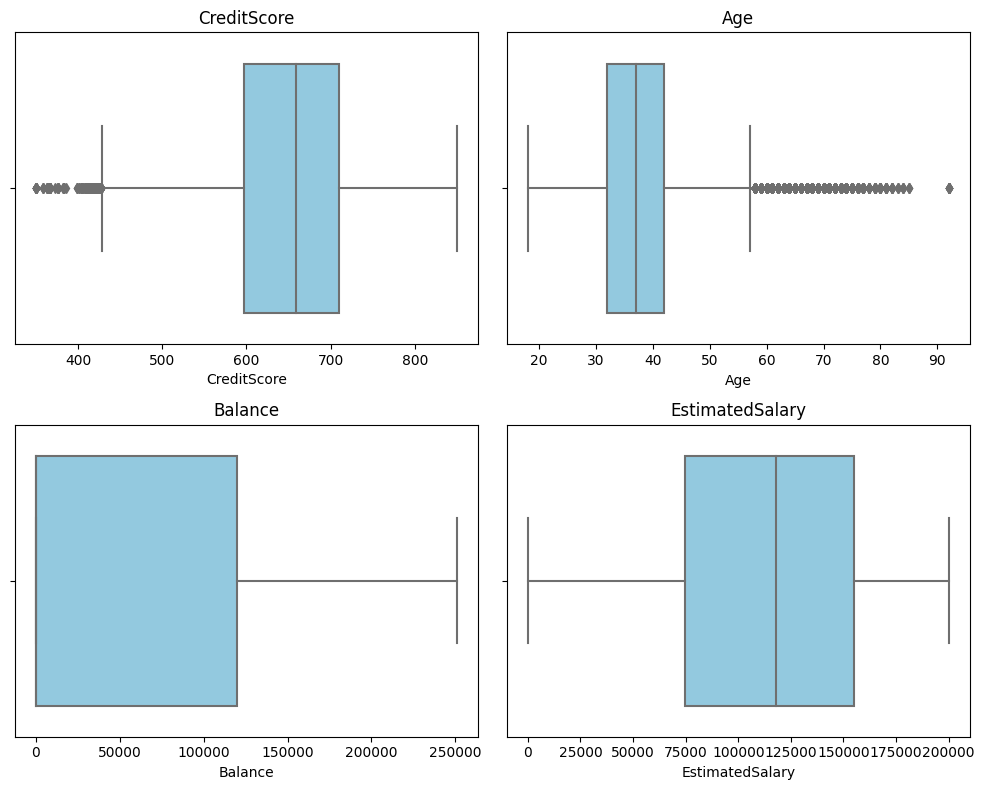

In [63]:
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# 创建一个包含四个子图的网格
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# 遍历数值列并在子图中添加箱线图
for i, col in enumerate(num_cols, start=0):
    row_num = i // 2
    col_num = i % 2
    sns.boxplot(x=train_df[col], ax=axs[row_num, col_num], color='skyblue')
    axs[row_num, col_num].set_title(col)

# 调整子图间距
plt.tight_layout()
plt.show()

*I dont Think that we need to remove the outliers because in thic case the outliers are giving some insights about data.*

## 2.3 Target Distribution
# <a id="2.3"></a>

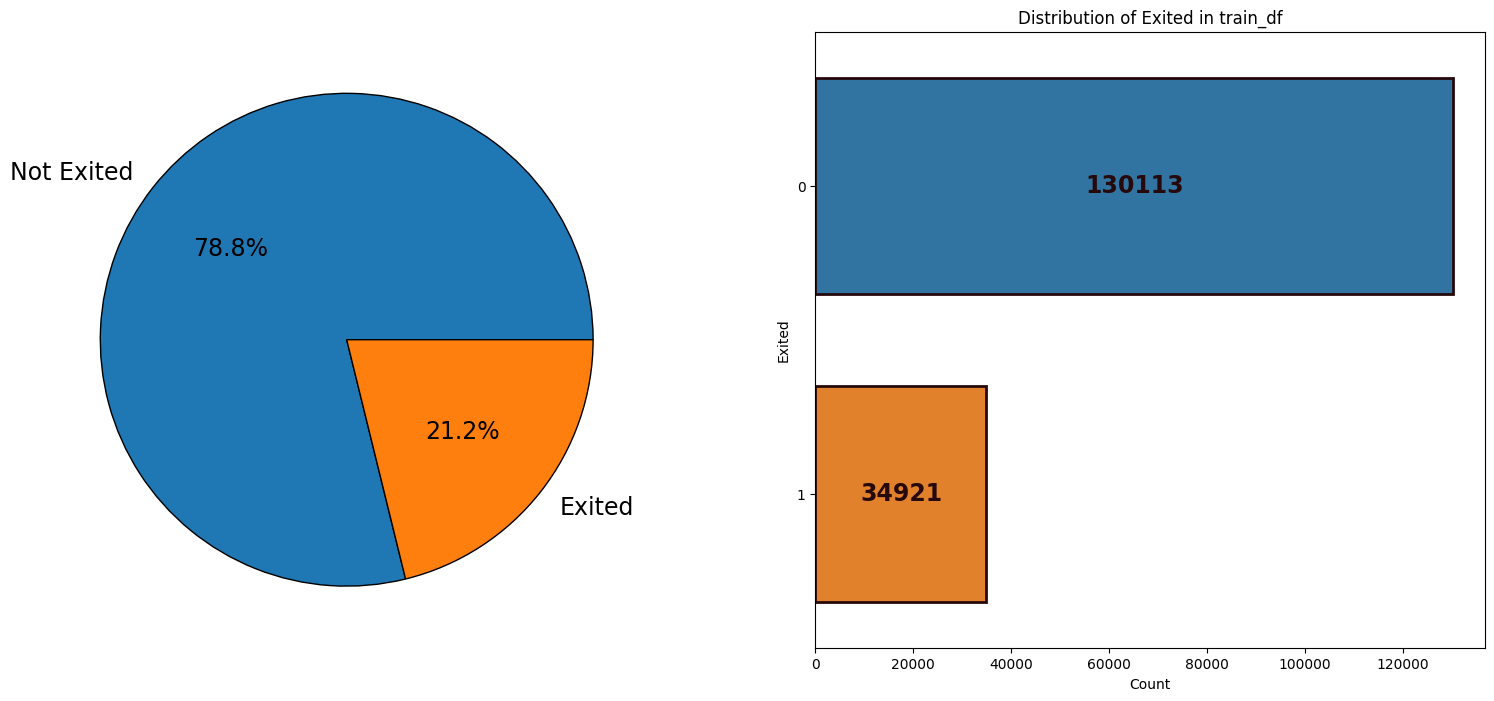

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(19,8))


wedges = ax[0].pie(autopct='%1.1f%%', x=train_df['Exited'].value_counts(), labels=['Not Exited', 'Exited'])
wedges[2][0].set_fontsize(17)
wedges[2][1].set_fontsize(17)
wedges[0][0].set_edgecolor('black')
wedges[0][1].set_edgecolor('black')
wedges[1][0].set_fontsize(17)
wedges[1][1].set_fontsize(17)

p = sns.countplot(y="Exited", data=train_df, edgecolor='#26090b', linewidth=2, width=0.7)

# Add text on top of the bars
for container in p.containers:
    plt.bar_label(container, label_type="center", color='#26090b', fontsize=17, weight='bold', padding=6, position=(0.5, 0.5),)

plt.title("Distribution of Exited in train_df")
plt.xlabel("Count")
plt.ylabel("Exited")
plt.savefig(f'/kaggle/working/target_distribution.svg')
plt.show()

*The distribution of categories for this variable is imbalanced, indicating a potential issue*

# <a id="3"></a><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Exploratory Data Analysis </p>   </span></font></center> 
# 3. Exploratory Data Analysis

## 3.1 Continuous and Categorical Features
# <a id="3.1"></a>

In [65]:
# Unique value counts for each column
unique_counts = train_df.nunique()

# Threshold to distinguish continuous and categorical
threshold = 12

continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()


if 'id' in continuous_vars:
    continuous_vars.remove('id')
if 'CustomerId' in continuous_vars:
    continuous_vars.remove('CustomerId')
if 'Surname' in continuous_vars:
    continuous_vars.remove('Surname')
if 'Exited' in categorical_vars:
    categorical_vars.remove('Exited')
    
print(f"Categorical Variables: {categorical_vars}")
print(f"Continousl/Numerical Variables: {continuous_vars}")

Categorical Variables: ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
Continousl/Numerical Variables: ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


## 3.2 Categorical Value Analysis
# <a id="3.2"></a>

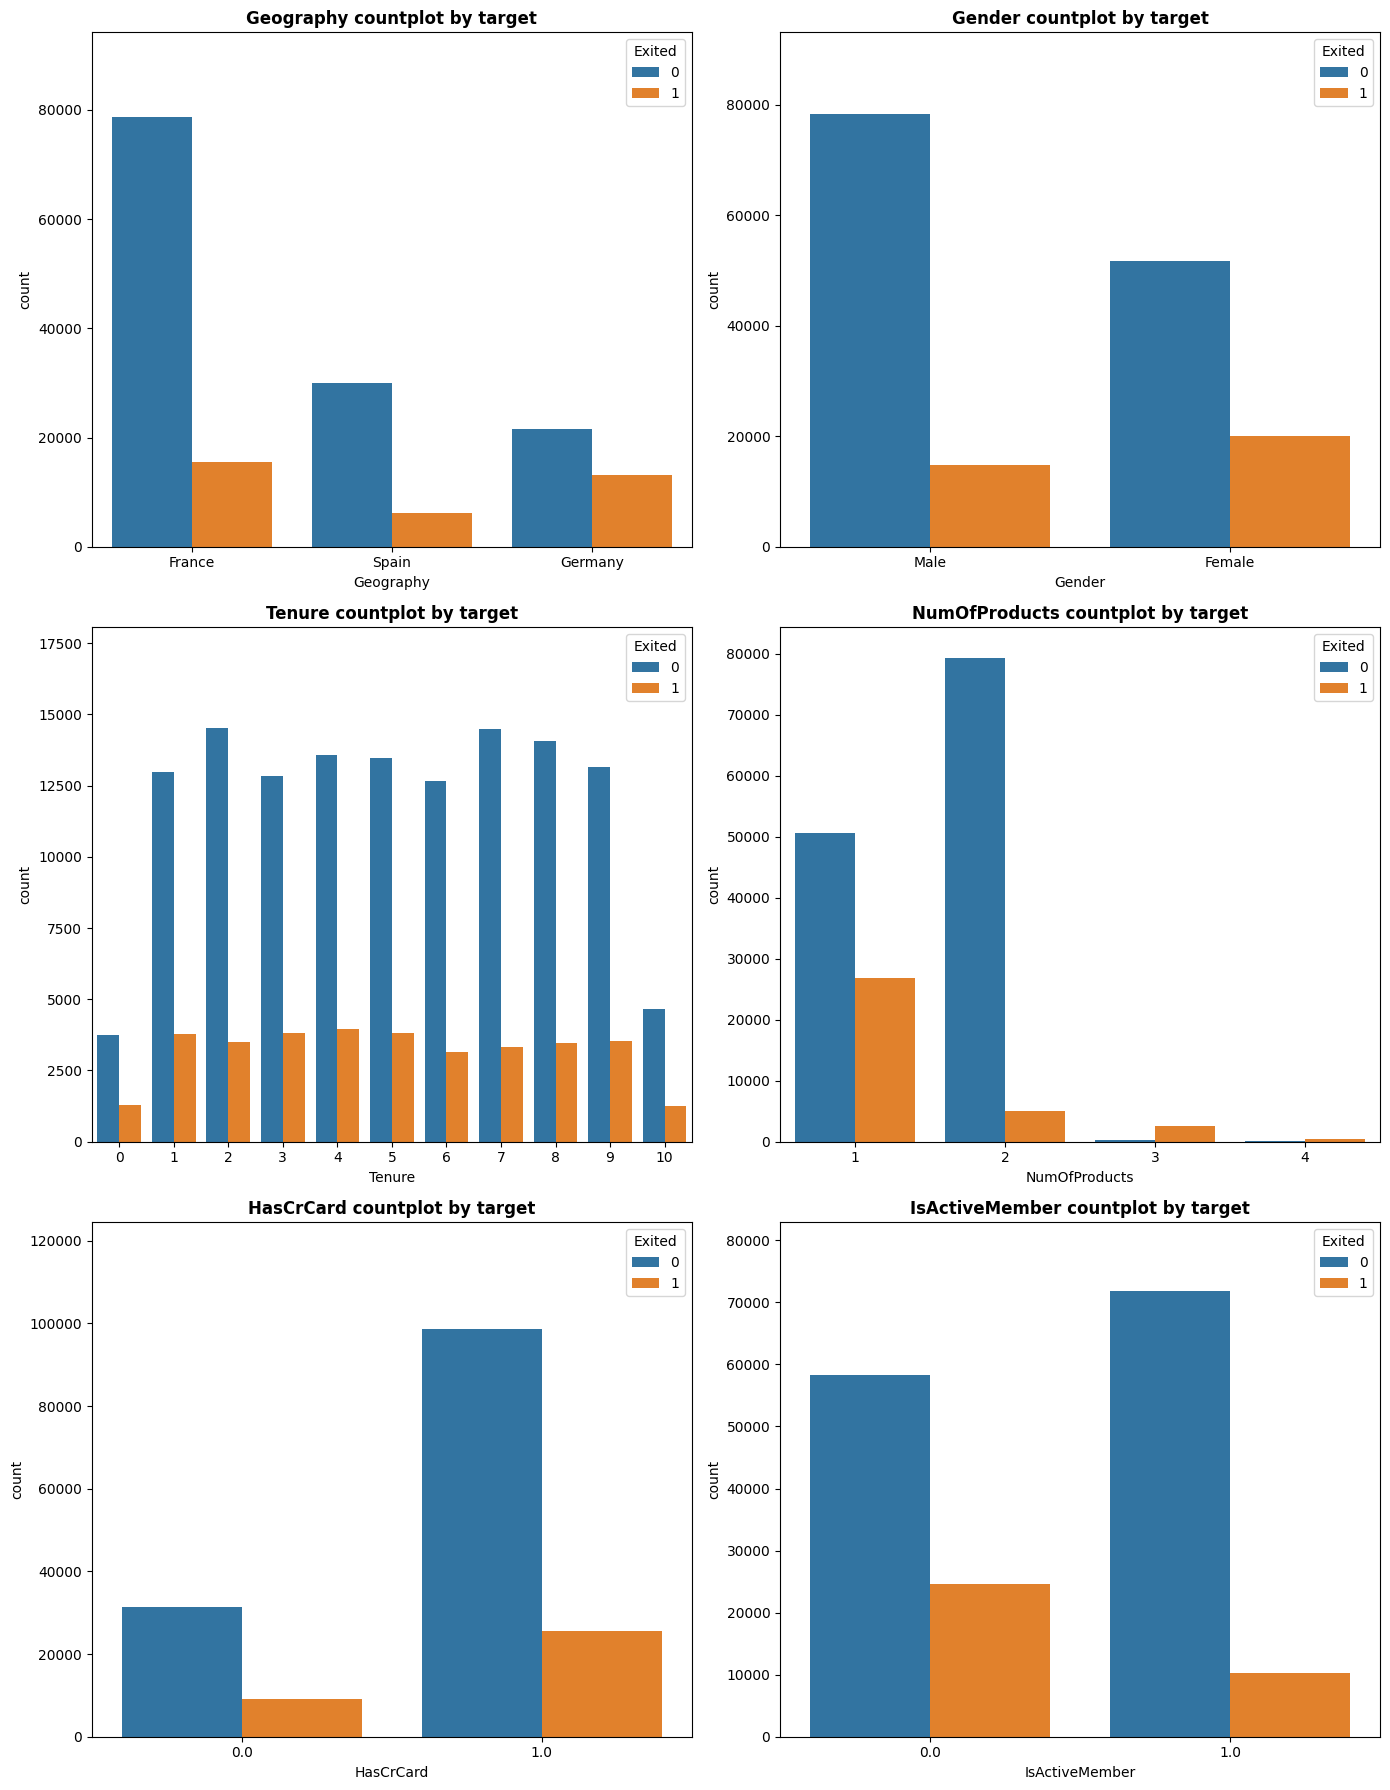

In [66]:
fig = plt.figure(figsize=(14, len(categorical_vars)*3))

for i, col in enumerate(categorical_vars):
    plt.subplot(len(categorical_vars)//2 + len(categorical_vars) % 2, 2, i+1)
    sns.countplot(x=col, hue='Exited', data=train_df)
    plt.title(f"{col} countplot by target", fontweight = 'bold')
    plt.ylim(0, train_df[col].value_counts().max() + 10)
    plt.savefig(f'/kaggle/working/{col}_analysis.svg')
#     plt.show()
plt.tight_layout()
plt.show()

## 3.3 Numerical Value Analysis
# <a id="3.3"></a>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

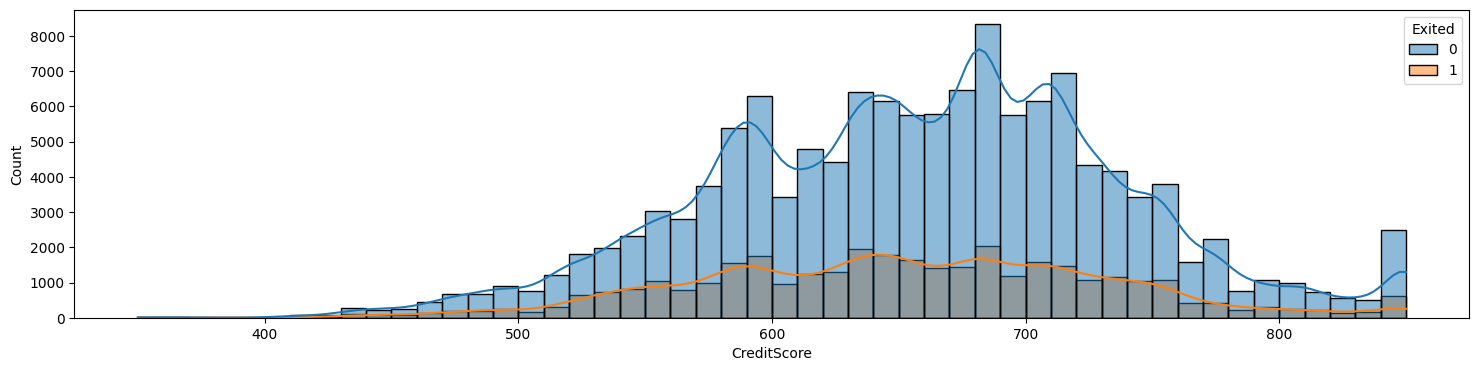

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



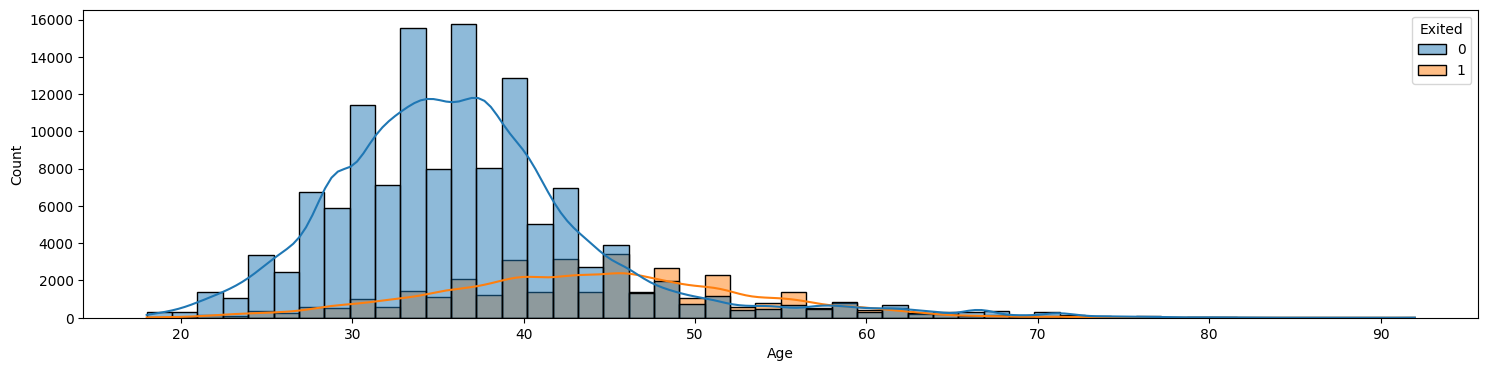

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



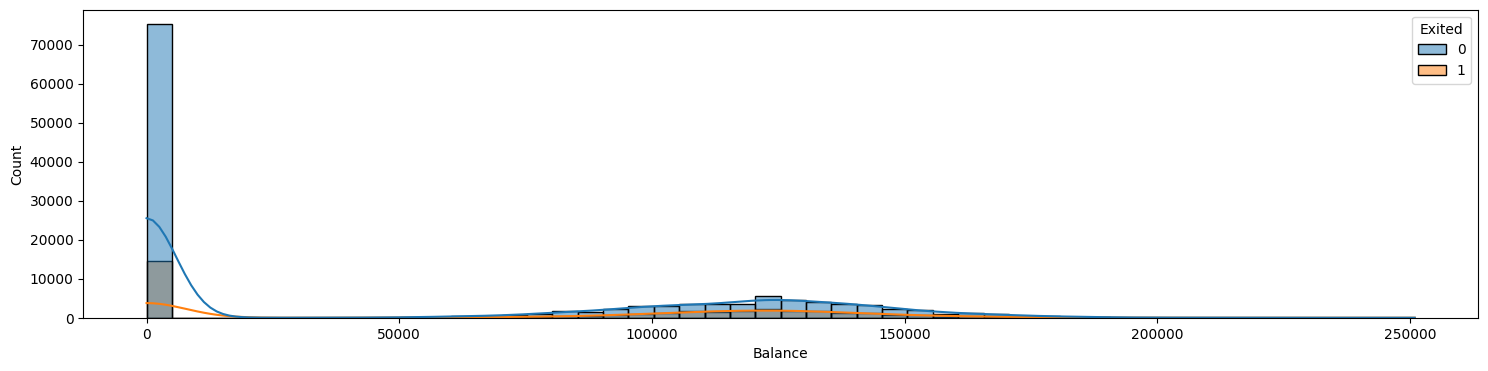

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



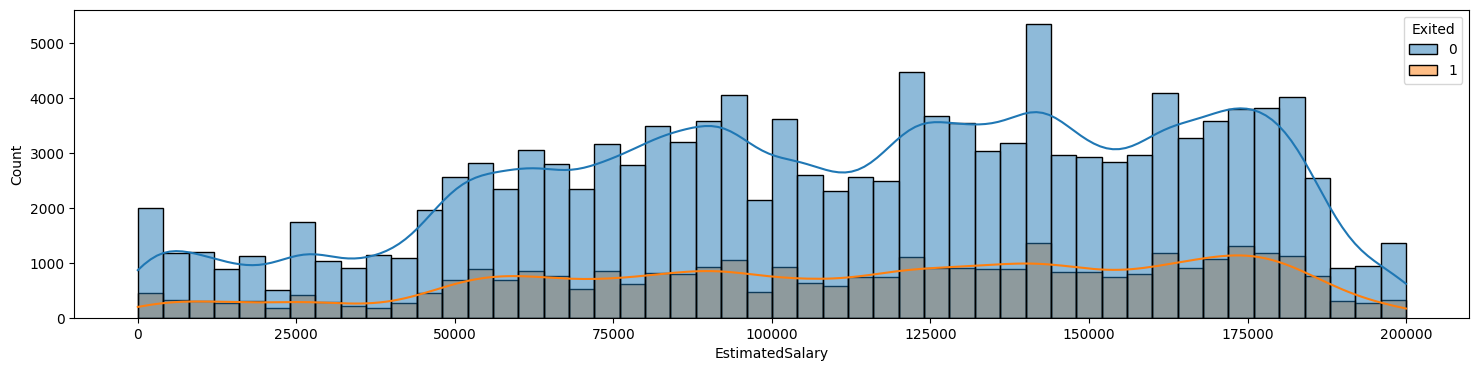

In [67]:
for col in continuous_vars:
    fig, ax = plt.subplots(figsize=(18, 4))
    fig = sns.histplot(data=train_df, x=col, hue="Exited", bins=50, kde=True)
    plt.savefig(f'/kaggle/working/{col}_analysis.svg')
    plt.show()

Multivariate Analysis:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/

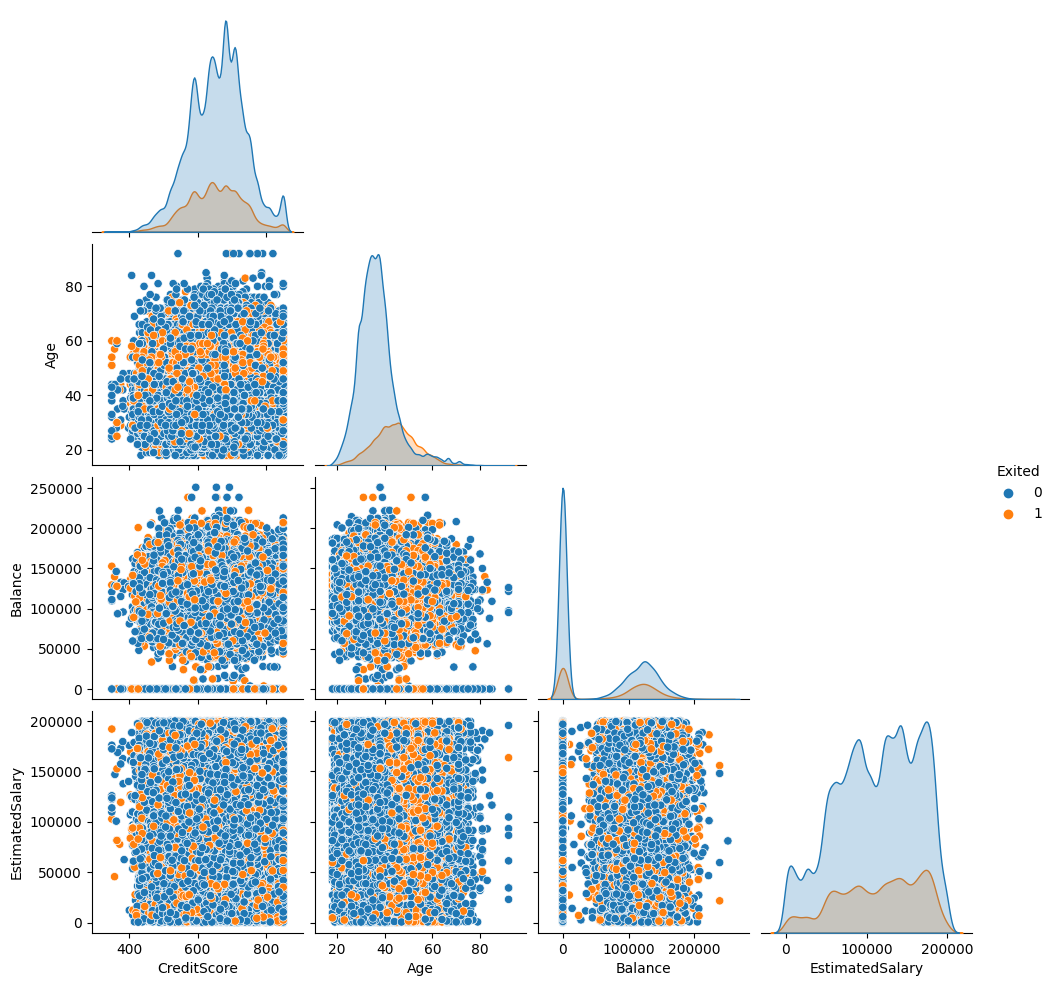

In [68]:
df3 = train_df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']].copy()
sns.pairplot(df3, hue="Exited", corner=True)
plt.show()

## 3.4 Correlation Matrix with Analysis
# <a id="3.4"></a>

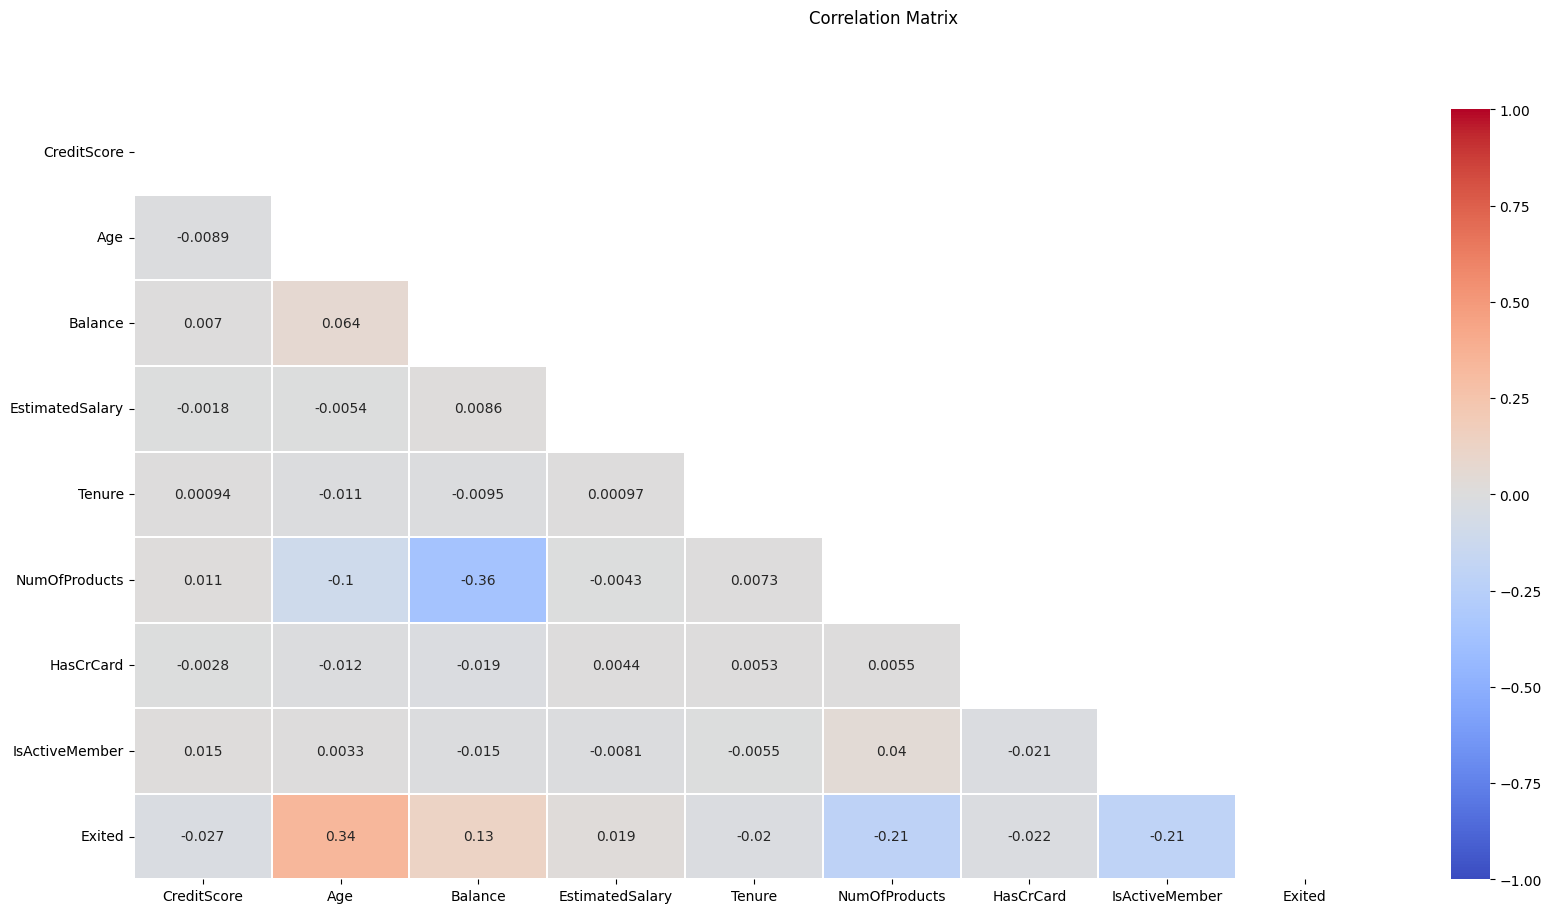

In [69]:
plt.figure(figsize=(20, 10))
df4 = train_df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 
       'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].copy()
corr=df4.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, 
                 yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
# mask = np.zeros_like(corr_matrix)
# mask[np.triu_indices_from(mask)] = True

# f,ax=plt.subplots(figsize=(15,11))
# sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.suptitle('Correlation Matrix')
plt.savefig('/kaggle/working/corr_mat.svg')
plt.show()

**Conclusion**
- The distribution of the `Geography` and `Gender` attributes among churned users is inconsistent with those of non-churned users.
- The distribution of the `Tenure` attribute among churned users is essentially consistent with that of non-churned users, while the `NumOfProducts` attribute among churned users is inconsistent with that of non-churned users. **It looks like the `numOfProducts` attribute might be an important variable for the target.**
- The distribution of the `hascrcard` attribute among churned users is largely consistent with that of non-churned users, whereas the distribution of the `isActivate` attribute among churned users is inconsistent with that of non-churned users.
- The distribution of `age` and `Balance` attributes among churned users is differ from those of non-churned users.
- The distribution of `CreditScore` and `EstimateSalary` attributes among churned users is consistent with that those of non-churned users.
- The variables `Age`, `Balance`, `NumOfProducts`, and `IsActiveMember` exhibit a significant linear relationship with Exited.

# <a id="4"></a><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Feature Engineering </p>   </span></font></center> 

# 4 Feature Engineering

## 4.1 Create Features
The `create_features` function enhances a given DataFrame by creating new features based on existing ones. Here's a concise summary of the code:

- `Senior`: Adds a binary column indicating whether a person is a senior (age 60 or above).

-  `Active_by_CreditCard`: Multiplies the binary columns `HasCrCard` and `IsActiveMember` to create a new feature.

- `Products_Per_Tenure`: Calculates the ratio of `Tenure` to `NumOfProducts` and creates a new column.

- `AgeCat` Divides ages by 20, rounds the result, and converts it to a categorical variable.
# <a id="4.1"></a>

In [70]:
def create_features(df):
    df['Senior'] = df['Age'].apply(lambda x: 1 if x >= 60 else 0)
    df['Active_by_CreditCard'] = df['HasCrCard'] * df['IsActiveMember']
    df['Products_Per_Tenure'] =  df['Tenure'] / df['NumOfProducts']
    df['AgeCat'] = np.round(df.Age/20).astype('int').astype('category')
    return df

train_df = create_features(train_df)
test_df = create_features(test_df)

In [71]:
# # Combining Customerid , Surname , Geography , and Gender , Estimated Slaray  and Making New Column in both Data Frames 
# train_df['Sur_Geo_Gend_Sal'] = train_df['CustomerId'].astype('str')+train_df['Surname']+train_df['Geography']+train_df['Gender']+np.round(train_df.EstimatedSalary).astype('str')
# test_df['Sur_Geo_Gend_Sal'] = test_df['CustomerId'].astype('str')+test_df['Surname']+test_df['Geography']+test_df['Gender']+np.round(test_df.EstimatedSalary).astype('str')

In [72]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import TruncatedSVD
# def get_vectors(train_df, test_df, col_name):

#     vectorizer = TfidfVectorizer(max_features=1000)
#     vectors_train = vectorizer.fit_transform(train_df[col_name])
#     vectors_test = vectorizer.transform(test_df[col_name])
    
#     #Dimensionality Reduction Using SVD ( Singular Value Decompostion)
#     svd = TruncatedSVD(3)
#     x_sv_train = svd.fit_transform(vectors_train)
#     x_sv_test = svd.transform(vectors_test)

#     # Convert to DataFrames
#     tfidf_df_train = pd.DataFrame(x_sv_train)
#     tfidf_df_test = pd.DataFrame(x_sv_test)

#     # Naming columns in the new DataFrames
#     cols = [(col_name + "_tfidf_" + str(f)) for f in tfidf_df_train.columns.to_list()]
#     tfidf_df_train.columns = cols
#     tfidf_df_test.columns = cols

#     # Reset the index of the DataFrames before concatenation
#     train_df = train_df.reset_index(drop=True)
#     test_df = test_df.reset_index(drop=True)

#     # Concatenate transformed features with original data
#     train_df = pd.concat([train_df, tfidf_df_train], axis="columns")
#     test_df = pd.concat([test_df, tfidf_df_test], axis="columns")
#     return train_df, test_df

In [73]:
# train_df, test_df = get_vectors(train_df, test_df,'Surname')
# train_df, test_df = get_vectors(train_df, test_df,'Sur_Geo_Gend_Sal')

## 4.2 Scaling of Numeric Features
# <a id="4.2"></a>
Scaling in machine learning is a critical step that standardizes feature values, ensuring equal consideration among variables and improving model performance. It prevents feature dominance, aids in convergence for scale-sensitive algorithms, and leads to more efficient training. By proportionally contributing to the learning process, scaling promotes unbiased predictions and enhances the overall effectiveness and stability of models across different datasets.

- Min-Max Standardization

In [74]:
numeirc_cols = ['Age','CreditScore', 'Balance', 'EstimatedSalary']
for col in numeirc_cols:
    minmax = MinMaxScaler()
    train_df[col] = minmax.fit_transform(train_df[[col]])
    test_df[col] = minmax.transform(test_df[[col]])

## 4.3 One-hot Encoding
# <a id="4.3"></a>
One-Hot Encoding: Converts categorical columns ('Geography', 'Gender', 'NumOfProducts', and 'AgeCat') into dummy variables using one-hot encoding.
The function then returns the modified DataFrame with these additional features.

In [75]:
onehot_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'AgeCat']
train_df = pd.get_dummies(train_df, columns=onehot_features)
test_df = pd.get_dummies(test_df, columns=onehot_features)

## 4.4 Ordinal Encoding
# <a id="4.4"></a>
Ordinal Encoding is a technique used to convert categorical variables into numerical form for machine learning algorithms. Its primary purpose is to enable algorithms to process data that consists of non-numeric categories by assigning an integer value to each unique category.

In [76]:
ordinal_features = ['Tenure', 'NumOfProducts']
ordinal_encoder = OrdinalEncoder()
train_df[ordinal_features] = ordinal_encoder.fit_transform(train_df[ordinal_features])
test_df[ordinal_features] = ordinal_encoder.transform(test_df[ordinal_features])

# <a id="5"></a><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Modeling</p>   </span></font></center> 

# 5. Modeling

In [77]:
X_train = train_df.drop(['id', 'CustomerId', 'Surname', 'Exited'], axis=1).copy()
y_train = train_df['Exited'].copy()
X_test = test_df.drop(['id', 'CustomerId', 'Surname'], axis=1).copy()

In [78]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, 
                                                      y_train, 
                                                      test_size = 0.2, 
                                                      random_state = 42, 
                                                      stratify=y_train)

In [79]:
def evaluation(model, X_train, y_train, X_valid, y_valid, model_name=None):
    
    score = cross_val_score(
        model, X_train, y_train, cv=5
    )
    print(f"Score: {np.mean(score)}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    print("Accuracy:", accuracy)
    cm = confusion_matrix(y_valid, y_pred)
    print("Confusion Matrix:\n", cm)
    print(classification_report(y_valid, y_pred))
    if model_name is not None:
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True)
        plt.title("CONFUSION MATRIX",fontsize=14)
        plt.savefig(f'/kaggle/working/{model_name}_cm.svg')
        plt.show()
    return accuracy

## 5.1 Logistic Regression (Baseline)
# <a id="5.1"></a>

Score: 0.8419338532354868
Accuracy: 0.8400642287999516
Confusion Matrix:
 [[24761  1262]
 [ 4017  2967]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     26023
           1       0.70      0.42      0.53      6984

    accuracy                           0.84     33007
   macro avg       0.78      0.69      0.72     33007
weighted avg       0.83      0.84      0.82     33007



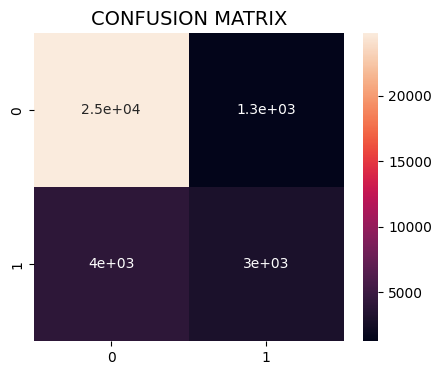

0.8400642287999516

In [80]:
baseline = LogisticRegression(random_state=42, max_iter=1000)
evaluation(baseline, X_train, y_train, X_valid, y_valid, 'baseline')

## 5.2 AdaBoost
# <a id="5.2"></a>

Score: 0.8607482020484376
Accuracy: 0.8618171902929681
Confusion Matrix:
 [[24756  1267]
 [ 3294  3690]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     26023
           1       0.74      0.53      0.62      6984

    accuracy                           0.86     33007
   macro avg       0.81      0.74      0.77     33007
weighted avg       0.85      0.86      0.85     33007



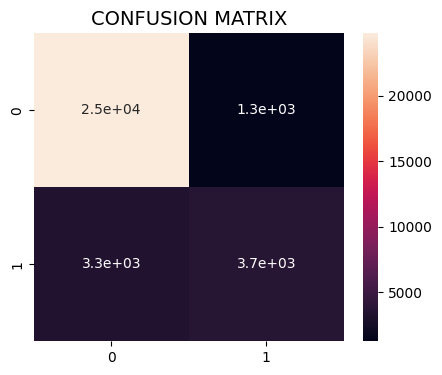

0.8618171902929681

In [81]:
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
evaluation(adaboost, X_train, y_train, X_valid, y_valid, 'adaboost')

## 5.3 Random Forest
# <a id="5.3"></a>

Score: 0.8569989743857167
Accuracy: 0.8543339291665404
Confusion Matrix:
 [[24540  1483]
 [ 3325  3659]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     26023
           1       0.71      0.52      0.60      6984

    accuracy                           0.85     33007
   macro avg       0.80      0.73      0.76     33007
weighted avg       0.84      0.85      0.85     33007



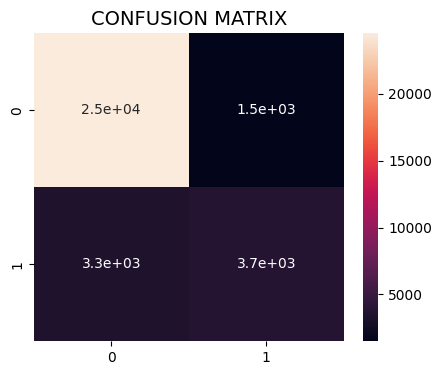

0.8543339291665404

In [82]:
# rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5, min_samples_leaf=5, min_samples_split=5, criterion='gini')
rf = RandomForestClassifier(n_estimators=100, random_state=42)
evaluation(rf, X_train, y_train, X_valid, y_valid, 'rf')

## 5.4 XGBoost
# <a id="5.4"></a>
eXtreme Gradient Boosting (XGBoost) is a scalable and improved version of the gradient boosting algorithm (terminology alert) designed for efficacy, computational speed and model performance.

Score: 0.8638839138471381
Accuracy: 0.8641197321780228
Confusion Matrix:
 [[24616  1407]
 [ 3078  3906]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26023
           1       0.74      0.56      0.64      6984

    accuracy                           0.86     33007
   macro avg       0.81      0.75      0.78     33007
weighted avg       0.86      0.86      0.86     33007



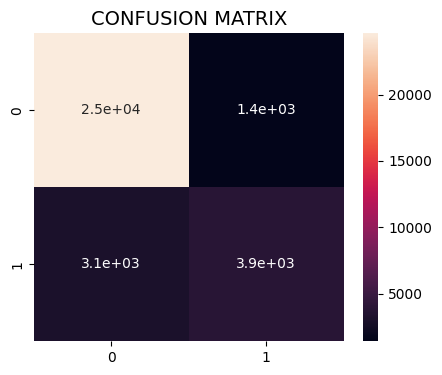

0.8641197321780228

In [83]:
clf_xgb = xgb.XGBClassifier(random_state=42)
evaluation(clf_xgb, X_train, y_train, X_valid, y_valid, 'xgboost')

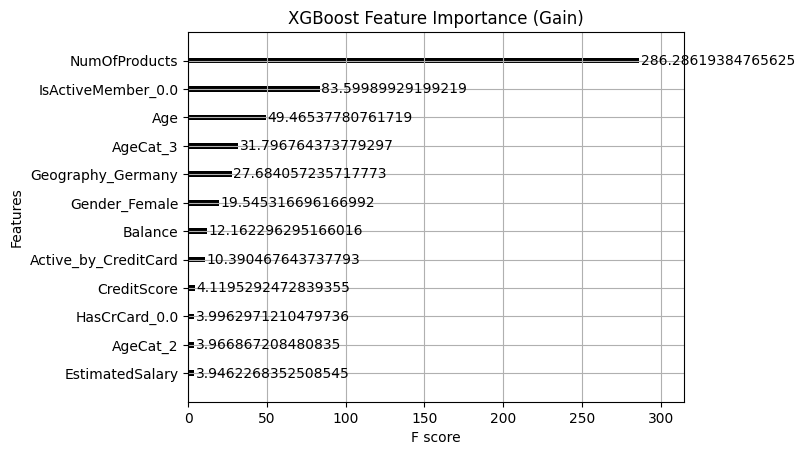

In [84]:
xgb.plot_importance(clf_xgb, importance_type="gain", max_num_features=12, color = "black",
                    title="XGBoost Feature Importance (Gain)")

plt.savefig('/kaggle/working/xgb_importances.svg')
plt.show()

## 5.5 LightGBM
# <a id="5.5"></a>
Light GBM is a high-performance gradient boosting framework for efficient tree-based machine learning, employing a leaf-wise growth strategy and histogram-based learning, ideal for large datasets and tasks where speed is paramount. "Paramount" means of chief importance or significance. In the context of the sentence I provided, it implies that Light GBM is particularly well-suited for tasks where speed is considered the most crucial or significant factor.

In [ ]:
# LightGBM Parameters
lgbParams = {'n_estimators': 1000,
             'max_depth': 25, 
             'learning_rate': 0.025,
             'min_child_weight': 3.43,
             'min_child_samples': 216, 
             'subsample': 0.782,
             'subsample_freq': 4, 
             'colsample_bytree': 0.29, 
             'num_leaves': 21}

clf_lgb = lgb.LGBMClassifier(random_state=42, **lgbParams)
evaluation(clf_lgb, X_train, y_train, X_valid, y_valid, 'lightgbm')

lgb.plot_importance(clf_lgb, importance_type="gain", figsize=(8,6), max_num_features=12, color = "black",
                    title="LightGBM Feature Importance (Gain)")

plt.savefig('/kaggle/working/lgb_importances.svg')
plt.show()

[LightGBM] [Info] Number of positive: 22349, number of negative: 83272
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 904
[LightGBM] [Info] Number of data points in the train set: 105621, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211596 -> initscore=-1.315331
[LightGBM] [Info] Start training from score -1.315331
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

## 5.6 CatBoost
# <a id="5.6"></a>
CatBoost is a powerful gradient boosting algorithm known for its efficient handling of categorical features and often exhibits high performance in predictive tasks, making it a suitable choice for various machine learning applications.

In [ ]:
cbParams = {
    'learning_rate': 0.022,
    'iterations': 1000,
    'verbose': False
}
clf_cb = cb.CatBoostClassifier(random_state=42, **cbParams)
evaluation(clf_cb, X_train, y_train, X_valid, y_valid, 'catboost')

# <a id="6"></a><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Results and Analysis</p>   </span></font></center> 

# 6. Results and Analysis
The performance of XGBoost, LightGBM, and CatBoost algorithms is quite similar. To further enhance the robustness of our models and reduce their variance, we utilized a voting method. We took a weighted average of the results from the three models to determine our final prediction. Additionally, we visualized the prediction results for a more comprehensive analysis.

In [ ]:
# Voting
voter = VotingClassifier(
    estimators=[('clf_lgb', clf_lgb), ('clf_xgb', clf_xgb), ('clf_cb', clf_cb)], 
    voting='soft'
)
evaluation(voter, X_train, y_train, X_valid, y_valid)

In [ ]:
voter.fit(pd.concat([X_train, X_valid]), pd.concat([y_train, y_valid]))
voter.predict_proba(X_test)

In [ ]:
y_pred = voter.predict_proba(X_test)
y_pred
submission = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')
submission['Exited'] = y_pred[:, 1]
submission.to_csv(r"/kaggle/working/submission.csv", index=False)

In [ ]:
submission.hist(column='Exited', bins=20, range=[0,1],figsize=(12,6))
plt.savefig('/kaggle/working/predict_target_distribution.svg')
plt.show()

**Observation**
- From the metrics of precision, recall, and F1-score, it is evident that the performance of XGBoost, LightGBM, and CatBoost algorithms is closely matched and significantly outperforms the Logistic Regression, Random Forest, and AdaBoost algorithms. For the final predictions, we employed a **voting method to ensemble above three models**, using the combined outcome as our final prediction.
- The distribution of the prediction labels remains consistent with that of the original dataset. 
- **Regarding feature importance rankings from LightGBM and XGBoost**, as previously mentioned, the attribute of `NumOfProducts` is the most critical variable, followed by `Age` and so on.

# <a id="7"></a><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#005F5D;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Discussion and Conclusion </p>   </span></font></center> 

# 7. Discussion and Conclusion 


- **Gains**: We applied several classification algorithms learned from the course, such as Logistic Regression, AdaBoost, and Random Forest, to real-world tasks. We also 
studied three common Boosting methods used in data mining competitions: XGBoost, LightGBM, and CatBoost, and mastered some basic feature engineering techniques, including one-hot encoding and scaling.

- Additionally, we experimented with applying SVM and KNN to our tasks. However, as the number of features and the volume of samples increased, the efficiency of these two algorithms plummeted, leading us to ultimately exclude them from consideration. At the same time, we attempted to use target encoding for feature construction, but the results indicated that this approach exacerbated model overfitting.

- **Suggestions**: Last but not last, it's worth considering the **TF-IDF method** for handling textual features in the data, which could potentially enhance model performance further. More **parameter optimization techniques** can be applied to XGBoost, LightGBM, and CatBoost.